# Load saved pipelines

In [4]:
import sys
import os
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Add the root folder to python path
sys.path.append(os.path.abspath("../"))
from src.evaluate import evaluate_model

X_train_processed = pd.read_csv("../data/processed/X_train_processed.csv")
X_test_processed = pd.read_csv("../data/processed/X_test_processed.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

lr_pipeline = joblib.load("../models/lr_pipeline.pkl")
rf_pipeline = joblib.load("../models/rf_pipeline.pkl")

# --- Logistic Regression ---

=== Logistic Regression Pipeline ===
=== Classification Metrics ===
Accuracy: 0.6327
Precision: 0.8485
Recall: 0.6327
F1-score: 0.6987


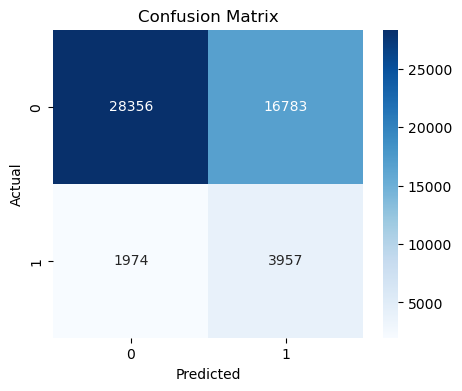

In [5]:

y_pred_lr = lr_pipeline.predict(X_test_processed)
print("=== Logistic Regression Pipeline ===")
evaluate_model(y_test, y_pred_lr, task="classification")

# --- Random Forest ---

=== Random Forest Pipeline ===
=== Classification Metrics ===
Accuracy: 0.8830
Precision: 0.8362
Recall: 0.8830
F1-score: 0.8362


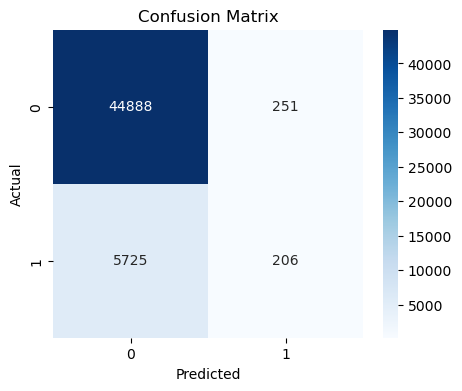

In [6]:
y_pred_rf = rf_pipeline.predict(X_test_processed)
print("=== Random Forest Pipeline ===")
evaluate_model(y_test, y_pred_rf, task="classification")

# Optional: compare directly

In [7]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy LR: {acc_lr:.4f}")
print(f"Accuracy RF: {acc_rf:.4f}")
print(f"Difference (RF - LR): {acc_rf - acc_lr:.4f}")

Accuracy LR: 0.6327
Accuracy RF: 0.8830
Difference (RF - LR): 0.2503


# ROC-AUC

In [8]:
# Predict probabilities for the positive class
lr_probs = lr_pipeline.predict_proba(X_test_processed)[:, 1]
rf_probs = rf_pipeline.predict_proba(X_test_processed)[:, 1]

# Calculate ROC-AUC
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print(f"Logistic Regression ROC-AUC: {lr_auc:.4f}")
print(f"Random Forest ROC-AUC: {rf_auc:.4f}")

Logistic Regression ROC-AUC: 0.7001
Random Forest ROC-AUC: 0.6557


# Interpretation:

1. Logistic Regression (LR)
    - Accuracy 0.6327 -> overall correct predictions are okay but low
    - Precision 0.8362 -> when LR predicts a positive class, it's usually correct.
    - Recall 0.6327 -> misses a lot of actual positive cases
    - F1-score 0.6987 -> harmonic mean -> moderate balance betwen precision and recall
    - ROC-AUC: 0.7001

2. Random Forest (RF)
    - Accuracy 0.8830-> much better than LR
    - Precision 0.8362 -> slightly lower than LR but still strong
    - Recall 0.8830 -> very good at capturing true positive
    - F1-score 0.8362 -> balanced precision and recall
    - ROC-AUC: 0.6557

3. LR vs RF
    - LR is linear, struggles with complex patterns -> high precision but low recall
    - RF is non-linear ensemble, captures patterns -> high accuracy, balanced metrics

4. Evaluation insight
    - Improvement : 0.2503 with RF
    - Baseline RF has much higher overall performance (accuracy, recall, F1-score).
    - Its ROC-AUC is low, which indicates room for improvement in probability ranking.
    - Tuning RF can simultaneously improve accuracy and ROC-AUC.
    - LR can remain as a reference model for interpretation.
    - RF is clearly the better candidate for further tuning or deployment